Données

Nous allons utiliser le jeu de données MNIST, qui contient des images de chiffres manuscrits. Les images sont en noir et blanc et ont une taille de 28x28 pixels.

Le fichier CSV contenant les données est disponible sur le site web du projet MNIST :

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

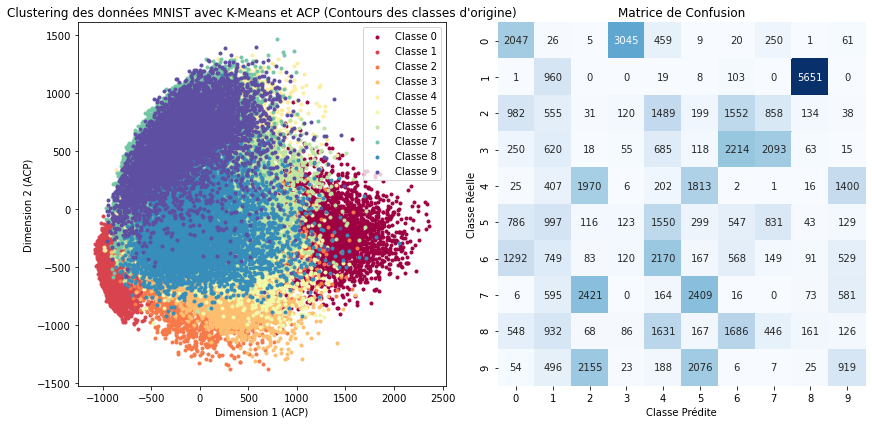

In [10]:

# Visualisation des clusters en 2D avec contours des classes d'origine
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Afficher les contours des classes d'origine
for i in range(10):
    plt.scatter(x_train_2d[y_train == i, 0], x_train_2d[y_train == i, 1], c=colors[i], label=f"Classe {i}",marker=".")



plt.legend()
plt.xlabel('Dimension 1 (ACP)')
plt.ylabel('Dimension 2 (ACP)')
plt.title('Clustering des données MNIST avec K-Means et ACP (Contours des classes d\'origine)')

# Créer la matrice de confusion
confusion = confusion_matrix(y_train, labels)

# Afficher la matrice de confusion avec Seaborn
plt.subplot(1, 2, 2)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de Confusion')
plt.xlabel('Classe Prédite')
plt.ylabel('Classe Réelle')

plt.tight_layout()
plt.show()


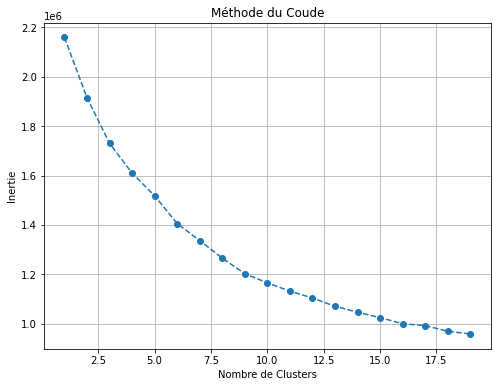

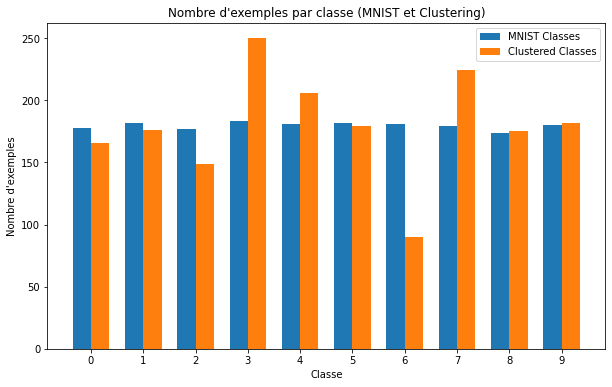

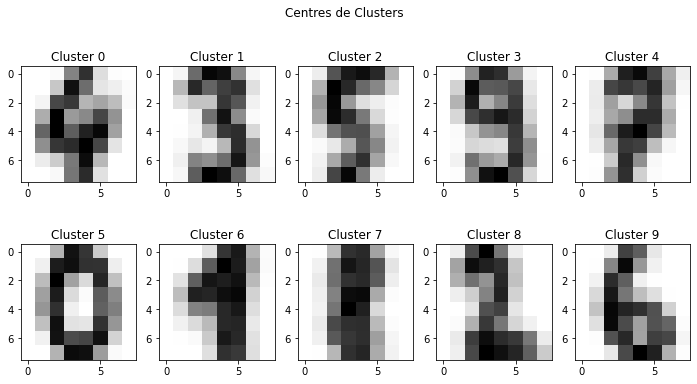

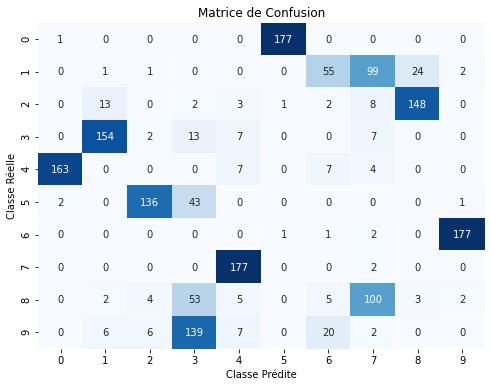

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Charger le jeu de données Digits
digits = datasets.load_digits()
X = digits.data  # Les caractéristiques (images des chiffres)

# Utiliser la méthode du coude pour trouver le nombre optimal de clusters
inertia = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude (Elbow Method)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 20), inertia, marker='o', linestyle='--')
plt.title('Méthode du Coude')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertie')
plt.grid()
plt.show()

# Appliquer K-Means avec le nombre optimal de clusters (par exemple, 10)
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

num_classes_mnist = 10

# Compter le nombre d'exemples par classe dans MNIST
counts_mnist = np.bincount(digits.target)

# Compter le nombre d'exemples par cluster
counts_clusters = np.bincount(y_kmeans)

# Créer un graphique à barres superposé
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(num_classes_mnist)
width = 0.35

bar1 = ax.bar(x - width/2, counts_mnist, width, label='MNIST Classes')
bar2 = ax.bar(x + width/2, counts_clusters, width, label='Clustered Classes')

ax.set_xlabel('Classe')
ax.set_ylabel('Nombre d\'exemples')
ax.set_title('Nombre d\'exemples par classe (MNIST et Clustering)')
ax.set_xticks(x)
ax.legend()

# Visualisation des clusters
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(kmeans.cluster_centers_[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Cluster {i}')
plt.suptitle('Centres de Clusters')
plt.show()

# Créer la matrice de confusion
confusion = confusion_matrix(digits.target, y_kmeans)

# Afficher la matrice de confusion avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de Confusion')
plt.xlabel('Classe Prédite')
plt.ylabel('Classe Réelle')
plt.show()


In [28]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Charger le jeu de données Digits
digits = datasets.load_digits()
X = digits.data  # Les caractéristiques (images des chiffres)

# Effectuer le clustering K-Means sur les données originales
kmeans_original = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans_original = kmeans_original.fit_predict(X)

# Mesurer la silhouette pour les données originales
silhouette_original = silhouette_score(X, y_kmeans_original)
print(f"Silhouette Score (Données Originales) : {silhouette_original}")

# Réduire la dimension avec PCA
pca = PCA(n_components=20)  # Réduisez la dimension à 20 composantes principales
X_pca = pca.fit_transform(X)

# Effectuer le clustering K-Means sur les données transformées par PCA
kmeans_pca = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans_pca = kmeans_pca.fit_predict(X_pca)

# Mesurer la silhouette pour les données transformées par PCA
silhouette_pca = silhouette_score(X_pca, y_kmeans_pca)
print(f"Silhouette Score (Données PCA) : {silhouette_pca}")


Silhouette Score (Données Originales) : 0.18251916424600556
Silhouette Score (Données PCA) : 0.21275296223334708


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

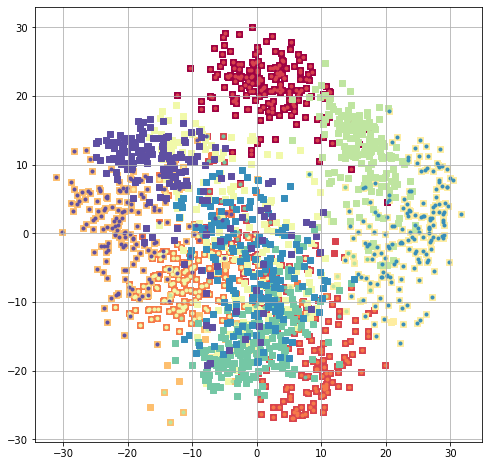

In [34]:
y = digits.target

unique_labels = np.unique(y)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(8,8))
# Afficher les contours des classes d'origine
for i in range(10):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=colors[i], label=f"Classe {i}",marker="s")
    plt.scatter(X_pca[y_kmeans_pca == i, 0], X_pca[y_kmeans_pca == i, 1], c=colors[i], label=f"Classe {i}",marker=".")

plt.grid()